In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data='../data/'
sns.set(rc={'figure.figsize':(4,3)})
def plot_dnam(df,cg,gene,lim,ylab='DNAm',legend=False,rond=1):
    ax=sns.stripplot(data=df.reset_index(),x='cohort',y=cg,s=1,alpha=.7, legend=legend, dodge=True,hue='age_c',hue_order=['young','old']);
    ax=sns.boxplot(data=df.reset_index(),x='cohort',y=cg,showfliers=False, fill=False, legend=False, showcaps=False,hue='age_c',hue_order=['young','old'])
    ax.set(ylim=lim,title=gene,ylabel=ylab, xlabel='')
    ax.set_xticks(ax.get_xticks()); ax.set_yticks(ax.get_yticks())
    ax.set_xticklabels(labels=['','',''])#['MESA\n 2000','MESA\n 2010'],size = 10);
    ax.set_yticklabels(ax.get_yticks().round(rond), size = 9);

def plot_rna(dd,gene,lim,ylab='Expression (log10)',s=1,labels=['MESA\n 2000','MESA\n 2010'],title='',palette='tab10',legend=False):
    print(gene)
    ax=sns.stripplot(data=dd,x='cohort',y=gene,s=s,alpha=.7, legend=legend, dodge=True,hue='age_c',hue_order=['young','old'],palette=palette);
    ax=sns.boxplot(data=dd,x='cohort',y=gene,showfliers=False, fill=False, legend=False, showcaps=False,hue='age_c',hue_order=['young','old'],palette=palette)
    ax.set(ylim=lim,ylabel=ylab, xlabel='', title=title)
    ax.set_xticks(ax.get_xticks()); ax.set_yticks(ax.get_yticks())
    ax.set_xticklabels(labels=['MESA1','MESA2','PPMI'],size = 9);
    ax.set_yticklabels(ax.get_yticks(), size = 9);
    plt.xticks(rotation=45)
    return ax  

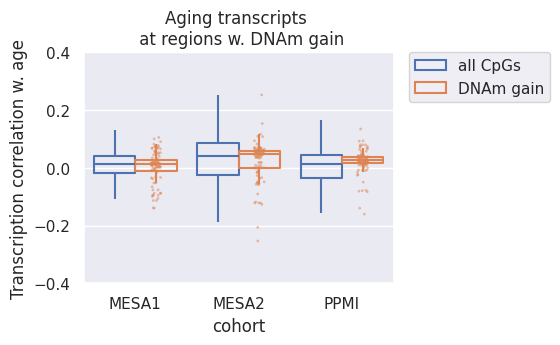

In [19]:
# 2a
pls=pd.read_csv(data+'figs/2a.csv',index_col=0)
direction='DNAm gain'
ax=sns.stripplot(data=pls.reset_index(),x='cohort',y='dot_plot',s=2,alpha=.5, dodge=True,hue='dnam_c',
                 legend=False,hue_order=['all CpGs',direction]);
ax=sns.boxplot(data=pls.reset_index(),x='cohort',y='rna_cor', hue='dnam_c',showfliers=False, fill=False, 
               showcaps=False, hue_order=['all CpGs',direction])
ax.set(ylim=[-.4,.4],title='Aging transcripts \n at regions w. '+direction, ylabel='Transcription correlation w. age');
ax.legend_.set_title(None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

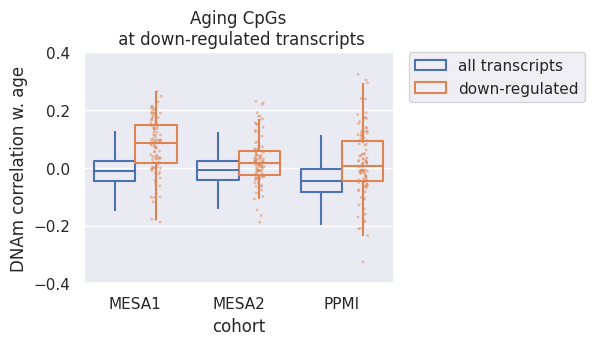

In [15]:
# 2b
pls=pd.read_csv(data+'figs/2b.csv',index_col=0)
direction='down-regulated'
ax=sns.stripplot(data=pls.reset_index(),x='cohort',y='dot_plot',s=2,alpha=.5, dodge=True,hue='rna_c',legend=False,
                 hue_order=['all transcripts',direction]);
ax=sns.boxplot(data=pls.reset_index(),x='cohort',y='cor', hue='rna_c',showfliers=False,fill=False, showcaps=False, 
               hue_order=['all transcripts',direction])
ax.set_yticks(ax.get_yticks());ax.set_xticks(ax.get_xticks());
ax.set(ylim=[-.4,.4],title='Aging CpGs\n at '+direction+' transcripts',ylabel='DNAm correlation w. age');
ax.legend_.set_title(None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

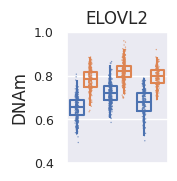

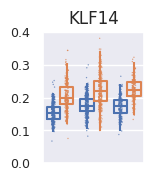

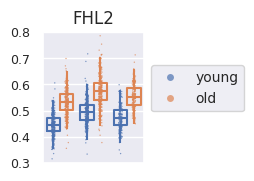

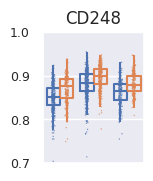

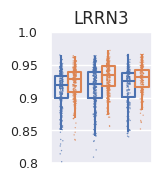

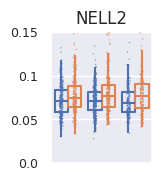

In [26]:
dd=pd.read_csv(data+'figs/2c_top_part.csv',index_col=0)
sns.set_theme(rc={'figure.figsize':(1.3,1.7)})
cg='cg16867657'; gene='ELOVL2'; lim=[.5,1]
plot_dnam(dd,cg,gene,lim)
plt.show()
cg='cg08097417'; gene='KLF14'; lim=[.05,.35]
plot_dnam(dd,cg,gene,lim,ylab='')
plt.show()
cg='cg06639320'; gene='FHL2'; lim=[.35,.75]
ax=plot_dnam(dd,cg,gene,lim,ylab='',legend=True)
plt.legend(prop={'size': 10}, markerscale=5, bbox_to_anchor=(1, .8),ncol=1,)
plt.show()
cg='cg22213242'; gene='CD248'; lim=[.75,.97]
plot_dnam(dd,cg,gene,lim,ylab='')
plt.show()
cg='cg09837977'; gene='LRRN3'; lim=[.8,.98]
plot_dnam(dd.head(len(dd)-1),cg,gene,lim,ylab='',rond=2)
plt.show()
cg='cg02756106'; gene='NELL2'; lim=[0,.15]
plot_dnam(dd.head(len(dd)-1),cg,gene,lim,ylab='',rond=2)
plt.show()


ELOVL2


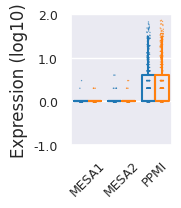

KLF14


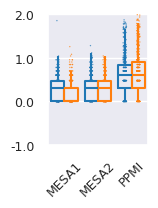

FHL2


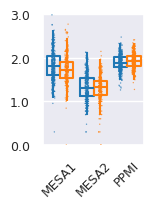

CD248


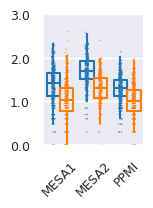

LRRN3


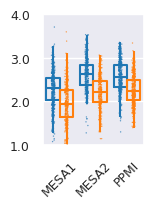

NELL2


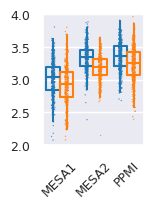

In [51]:
dd=pd.read_csv(data+'figs/2c_bottom.csv',index_col=0)
sns.set_theme(rc={'figure.figsize':(1.3,1.7)})
gene='ELOVL2';  lim=[-.1,2]
plot_rna(dd,gene,lim)
plt.show()
gene='KLF14'; lim=[-.1,2]
plot_rna(dd,gene,lim, ylab='')
plt.show()
gene='FHL2'; lim=[0,3]
plot_rna(dd,gene,lim, ylab='')
plt.show()
gene='CD248'; lim=[0,3]
plot_rna(dd,gene,lim, ylab='')
plt.show()
gene='LRRN3'; lim=[1,4]
ax=plot_rna(dd,gene,lim, ylab='')
#ax.set_yticklabels(labels=['0','0.5k','1k','1.5k'])
plt.show()
gene='NELL2'; lim=[2,4]
ax=plot_rna(dd,gene,lim, ylab='')
#ax.set_yticklabels(labels=['0','2k','4k'])
plt.show()

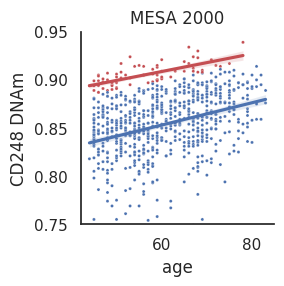

In [31]:
v1=pd.read_csv(data+'figs/2d1.csv',index_col=0)
sns.set(style="white",rc={'figure.figsize':(2.5,2.5)})
sns.scatterplot(data=v1,x='age',y='cg22213242',hue='AA',s=5,palette=['b','r'])
ax=sns.regplot(data=v1[~v1['AA']],x='age',y='cg22213242',scatter=False,line_kws=dict(color="b"));
ax=sns.regplot(data=v1[v1['AA']],x='age',y='cg22213242',scatter=False,line_kws=dict(color="r"));
ax.set(title='MESA 2000');
ax.set(ylim=[.75,.95],ylabel='CD248 DNAm');
ax.get_legend().set_visible(False);
sns.despine()

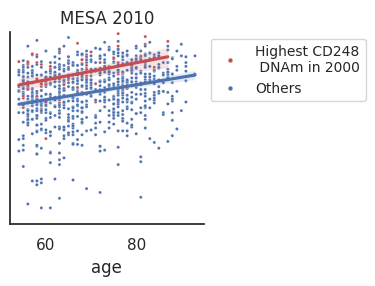

In [33]:
v2=pd.read_csv(data+'figs/2d2.csv',index_col=0)
sns.scatterplot(data=v2,x='age',y='cg22213242',hue='AA',
                hue_order=['Highest CD248\n DNAm in 2000','Others'],s=5,palette=['r','b'])
ax=sns.regplot(data=v2[v2['AA']=='Others'],x='age',y='cg22213242',scatter=False,line_kws=dict(color="b"));
ax=sns.regplot(data=v2[v2['AA']=='Highest CD248\n DNAm in 2000'],x='age',y='cg22213242',scatter=False,line_kws=dict(color="r"));
ax.set(title='MESA 2010');
ax.set(ylim=[.75,.95],ylabel='');
ax.set_yticklabels(labels=[])
plt.legend(prop={'size': 10}, markerscale=1.5, bbox_to_anchor=(1, 1),ncol=1)
sns.despine()

/tmp/ipykernel_239902/1443861219.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0','20','40','60','80','100'])


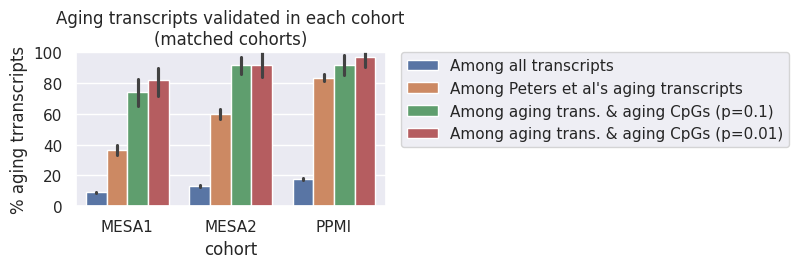

In [21]:
# 2e
pl=pd.read_csv(data+'figs/2e.csv',index_col=0)
sns.set(rc={'figure.figsize':(4,2)})
ax=sns.barplot(data=pl.reset_index(),x='cohort',y='pp',hue='q');
ax.set(ylim=[0,1],xlabel='cohort',ylabel='% aging trranscripts',
       title='Aging transcripts validated in each cohort\n(matched cohorts)');
ax.set_yticklabels(['0','20','40','60','80','100'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);